# Trust but Verify - Inspection of Large Image Collections

This notebook and accompanying [Python script characterize_data.py](characterize_data.py) illustrate the use of SimpleITK as a tool for efficient data inspection on large image collections, as part of familiarizing oneself with the data and performing cleanup prior to its use in deep learning or any other supervised machine learning approach.

The reasons for inspecting your data before using it include:
1. Identification of corrupt images.
2. Identification of erroneous images (label noise).
3. Assessment of data quality and variability in terms of intensity range, image resolution, and pixel types.
4. Reduction of workload, identifying redundant information content (e.g. a greyscale/single channel image masquerading as a color/three channel image - think x-ray in jpg file).


We inspect our data in two ways:
1. Summary of image characteristics found in a directory structure (generic and DICOM specific).
2. Visual inspection of the image content.

SimpleITK allows us to easily control for the image types we are interested in via the ImageIO. The currently supported/registered IO types are defined by the following strings:
* 'BMPImageIO'
* 'BioRadImageIO'
* 'Bruker2dseqImageIO'
* 'GDCMImageIO'
* 'GE4ImageIO'
* 'GE5ImageIO'
* 'GiplImageIO'
* 'HDF5ImageIO'
* 'JPEGImageIO'
* 'JPEG2000ImageIO'
* 'LSMImageIO'
* 'MINCImageIO'
* 'MRCImageIO'
* 'MetaImageIO'
* 'NiftiImageIO'
* 'NrrdImageIO'
* 'PNGImageIO'
* 'StimulateImageIO'
* 'TIFFImageIO'
* 'VTKImageIO'
* '' - empty string denotes all image file formats.

To see the set of ImageIO types supported by your version of SimpleITK, call [ImageFileReader::GetRegisteredImageIOs()](https://simpleitk.org/doxygen/latest/html/classitk_1_1simple_1_1ImageReaderBase.html#a4cbb7db3eb3796eee8d89a1aaf011511) or simply print an ImageFileReader object.

In [1]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
import ipympl
from DicomHelper import *


# utility method that either downloads data from the Girder repository or
# if already downloaded returns the file name for reading from disk (cached data)
OUTPUT_DIR = "Output"



In [2]:
%env SITK_SHOW_COMMAND /Applications/Slicer.app/Contents/MacOS/Slicer

env: SITK_SHOW_COMMAND=/Applications/Slicer.app/Contents/MacOS/Slicer


In [3]:
%matplotlib widget

In [4]:
data_root_dir = "/Users/seanreed/Documents/unlabeled-data/antech-ct"

In [5]:
!ls $data_root_dir

1.2.276.0.2783747.3.1.2.1150183542.91496.1584557269.16654
1.2.276.0.2783747.3.1.2.1150183542.91496.1584560923.16663
1.2.276.0.7230010.3.1.2.2733322860.4416.1572435955.336
1.2.276.0.7230010.3.1.2.738517100.4712.1625692712.6881
1.2.276.0.7230010.3.1.2.738517100.4712.1625694761.7821
1.2.276.0.7230010.3.1.2.738517100.4712.1625695650.8766
1.2.276.0.7230010.3.1.2.738517100.5904.1625697387.543
1.2.276.0.7230010.3.1.2.738517100.7560.1611692908.810
1.2.276.0.7230010.3.1.2.738517100.7560.1611699852.1756
1.2.392.200036.9116.2.2.2.1762671078.1544058796.778235
1.2.392.200036.9116.2.2.2.1762671078.1544062790.854133
1.2.392.200036.9116.2.2.2.1762671078.1544064007.853456
1.2.392.200036.9116.2.2.2.1762671078.1544065347.70543
1.2.392.200036.9116.2.2.2.1762671078.1544071914.125853
1.2.392.200036.9116.2.2.2.1762671078.1544074601.48209
1.2.392.200036.9116.2.2.2.1762671078.1544578457.236922
1.2.392.200036.9116.2.2.2.1762671078.1555384900.905993
1.2.392.200036.9116.2.2.2.1762671078.1557288274.152614
1.2.392.

## Characterizing  image set

To characterize the image set we have written a [Python script](characterize_data.py) that you should run from the command line. This script is very flexible and allows you to robustly characterize your image set. Try the various options and learn more about your data. You'd be surprised how many times the data isn't what you thought it is when only relying on visual inspection. The script allows you to inspect your data both on a file by file basis and as DICOM series where an image (volume) is stored in multiple files.

File by file:
```
python characterize_data.py data output/generic_image_data_report.csv per_file \
--imageIO "" --external_applications ./dciodvfy --external_applications_headings "DICOM Compliant" \
--metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view"
```

DICOM series:
```
python characterize_data.py data output/DICOM_image_data_report.csv per_series \
--metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view"  
```


After characterizing the image set we turn to visual inspection. 

In [ ]:
!python characterize_data.py --dir $data_root_dir --output "./Output/output_antech_ct_2.csv" --metadata_keys "0008|0060" "0018|5101" --metadata_keys_headings "modality" "radiographic view" 

## Now we look at our data using the DICOM series based approach.

After selecting our images of interest we print the associated files. Notice that for the series based approach for some images there is a single file association and for some multiple files.

In [11]:
### unlabeled data
data_root_dir = "/Users/seanreed/Documents/unlabeled-data/antech-ct"

In [12]:
data_root_dir = "/Users/seanreed/Documents/unlabeled-data/antech-ct"
# data_root_dir = "/Users/seanreed/Documents/CT-Downloads"

faux_series_volume_file_name = os.path.join(OUTPUT_DIR, "faux_series_volume.pkl")
faux_series_file_list_name = os.path.join(OUTPUT_DIR, "faux_series_file_list.pkl")
faux_volume_image_files, image_file_list = visualize_series(
    data_root_dir, projection_axis=2, thumbnail_size=[64, 64], tile_size=[5, 5]
)
with open(faux_series_volume_file_name, "wb") as fp:
    pickle.dump(faux_volume_image_files, fp)
with open(faux_series_file_list_name, "wb") as fp:
    pickle.dump(image_file_list, fp)

GDCMSeriesFileNames (0x7ffa6991d270): No Series were found

GDCMSeriesFileNames (0x7ffa69dff650): No Series were found

GDCMSeriesFileNames (0x7ffa6991e260): No Series were found

GDCMSeriesFileNames (0x7ffa6a63d6d0): No Series were found

GDCMSeriesFileNames (0x7ffa6a63ae10): No Series were found

GDCMSeriesFileNames (0x7ffa6a63bf40): No Series were found

GDCMSeriesFileNames (0x7ffa64076300): No Series were found

GDCMSeriesFileNames (0x7ffa64076300): No Series were found

GDCMSeriesFileNames (0x7ffa64075740): No Series were found

GDCMSeriesFileNames (0x7ffa64075740): No Series were found

GDCMSeriesFileNames (0x7ffa69dff940): No Series were found

GDCMSeriesFileNames (0x7ffa69dff940): No Series were found

GDCMSeriesFileNames (0x7ffa69de76a0): No Series were found

GDCMSeriesFileNames (0x7ffa6a63c050): No Series were found

GDCMSeriesFileNames (0x7ffa69dffbe0): No Series were found

GDCMSeriesFileNames (0x7ffa6a63c050): No Series were found

GDCMSeriesFileNames (0x7ffa69de7650): No

In [14]:
print(image_file_list[:2])
print(len(image_file_list))
for i, sub_list in enumerate(image_file_list):
    print(f"sub_list{i} has {len(sub_list)} dicom files")

(['/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1602650139.663143/1.2.392.200036.9116.2.2.2.1762671078.1602652511.863583.dcm', '/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1602650139.663143/1.2.392.200036.9116.2.2.2.1762671078.1602652493.616141.dcm', '/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1602650139.663143/1.2.392.200036.9116.2.2.2.1762671078.1602652469.591058.dcm', '/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1602650139.663143/1.2.392.200036.9116.2.2.2.1762671078.1602652425.401946.dcm', '/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1602650139.663143/1.2.392.200036.9116.2.2.2.1762671078.1602652403.301546.dcm'], ['/Users/seanreed/Documents/unlabeled-data/antech-ct/1.2.392.200036.9116.2.2.2.1762671078.1544058796.778235/1.2.392.200036.9116.2.2.2.1762671078.1544067953.7

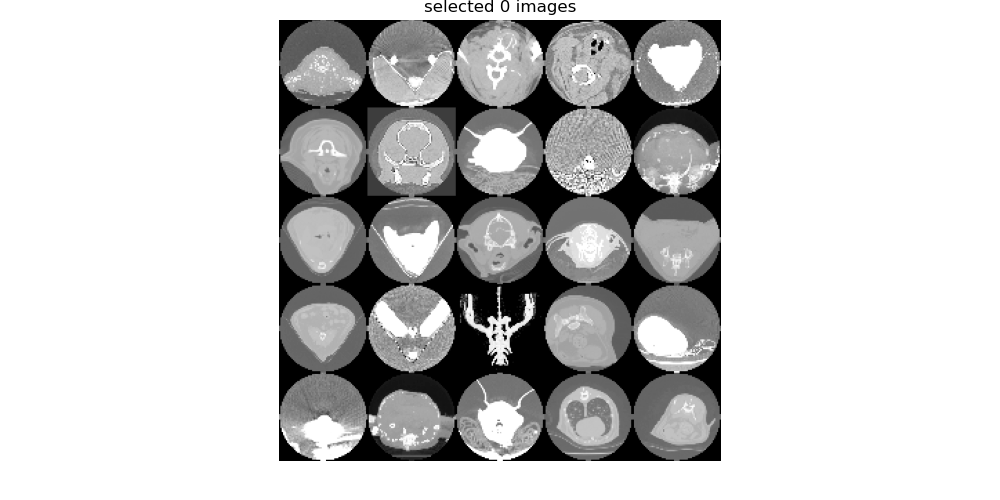

In [15]:
with open(faux_series_volume_file_name, "rb") as fp:
    faux_volume_image_files = pickle.load(fp)
with open(faux_series_file_list_name, "rb") as fp:
    image_file_list = pickle.load(fp)

image_selection_gui2 = ImageSelection(
    faux_volume_image_files,
    image_file_list,
    figure_size=(10, 5),
    selection_func=show_image,
)

In [16]:
selected_files = image_selection_gui2.get_selected_images()
print(selected_files)

[]
